In [3]:
from xgboost import plot_importance

In [5]:
from xgboost import XGBClassifier

In [7]:
from xgboost import plot_importance

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [13]:
import pandas as pd

In [15]:
iris = pd.read_csv("../data/iris.csv")       # csv 파일 형태로 불러와 iris에 저장
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
cols = list(iris.columns)       # iris의 컬럼 리스트 생성
cols

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [21]:
col_x = cols[:4]
col_y = cols[-1]

In [23]:
iris_train, iris_test = train_test_split(iris, test_size=0.2, random_state=123)     # train_test_spilt 함수에 대해 찾아보자
print(iris_train.shape)                                                             # shape 가 무슨 멤버인지도 알아보자
print(iris_test.shape)

(120, 5)
(30, 5)


In [25]:
iris_train, iris_test

(pandas.core.frame.DataFrame,
      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
 72            6.3          2.5           4.9          1.5  versicolor
 112           6.8          3.0           5.5          2.1   virginica
 132           6.4          2.8           5.6          2.2   virginica
 88            5.6          3.0           4.1          1.3  versicolor
 37            4.9          3.6           1.4          0.1      setosa
 138           6.0          3.0           4.8          1.8   virginica
 87            6.3          2.3           4.4          1.3  versicolor
 42            4.4          3.2           1.3          0.2      setosa
 8             4.4          2.9           1.4          0.2      setosa
 90            5.5          2.6           4.4          1.2  versicolor
 141           6.9          3.1           5.1          2.3   virginica
 33            5.5          4.2           1.4          0.2      setosa
 59            5.2          2.7           3.9  

In [27]:
model = XGBClassifier()                                     # model이 무엇의 인스턴스인지
model.fit(X=iris_train[col_x], y=iris_train[col_y])         # fit도 알아보자
model

[19:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
fscore = model.get_booster().get_fscore()                   # get_booster, get_fscore 가 무엇인지
fscore

{'Petal.Length': 123,
 'Petal.Width': 90,
 'Sepal.Length': 72,
 'Sepal.Width': 109}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

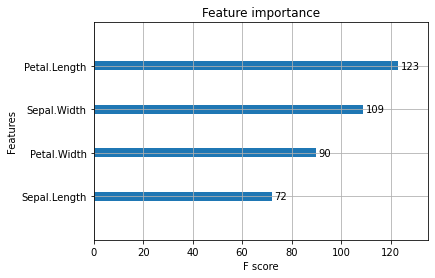

In [31]:
plot_importance(model)                                      # plot_importance가 어떤식으로 차트를 만드는지

5. model 평가

In [33]:
y_pred = model.predict(iris_test[col_x])    # 예측치 # predict가 무슨 기능을 하는 함수인가?
y_true = iris_test[col_y]

acc = accuracy_score(y_true, y_pred)
acc

0.9666666666666667

In [35]:
con_mat = confusion_matrix(y_true, y_pred)      # confusion_matrix()?
con_mat

array([[13,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 10]], dtype=int64)

In [37]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

